In [1]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])

In [2]:
def posterior_grid_approx(grid_points=100, success=6, tosses=9):
    """
    """
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = np.repeat(5, grid_points)  # uniform
    #prior = (p_grid >= 0.5).astype(int)  # truncated
    #prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

In [3]:
PrPV = 0.95
PrPM = 0.01
PrV = 0.001
PrP = PrPV * PrV + PrPM * (1 - PrV)
PrVP = PrPV * PrV / PrP
print(PrVP)

0.08683729433272395


In [4]:
p_grid = np.linspace(0, 1, num=1000)
prior = np.repeat(1,1000)
likelihood = stats.binom.pmf(6,9,p_grid)
posterior = likelihood*prior
posterior = posterior/sum(posterior)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

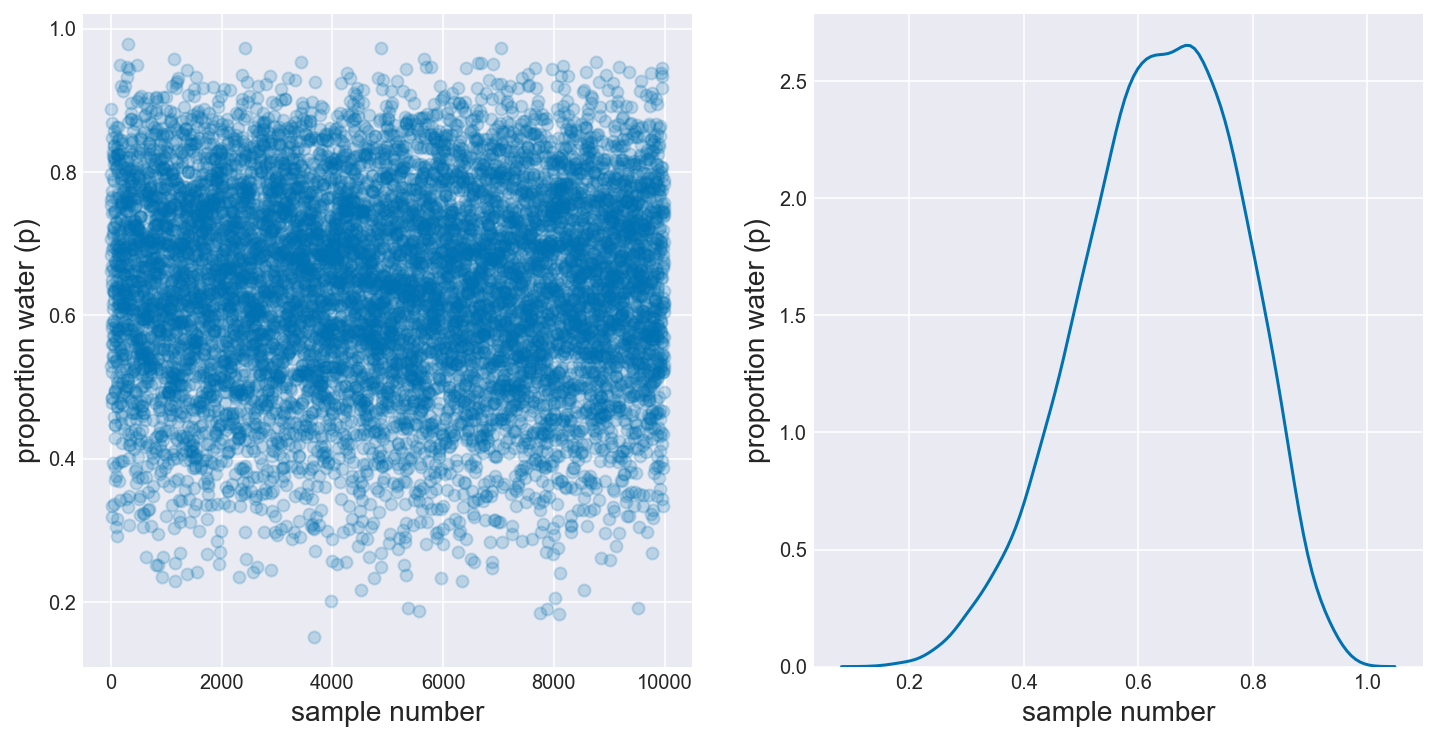

In [5]:
_, (ax0, ax1) = plt.subplots(1,2, figsize=(12,6))
ax0.plot(samples, 'o', alpha=0.2)
ax0.set_xlabel('sample number', fontsize=14)
ax0.set_ylabel('proportion water (p)', fontsize=14)
sns.kdeplot(samples, ax=ax1)
ax1.set_xlabel('sample number', fontsize=14)
ax1.set_ylabel('proportion water (p)', fontsize=14);

In [6]:
sum(posterior[ p_grid < 0.5 ])

0.17187458902022879

In [7]:
sum(samples <0.5)/1e4

0.1646

In [8]:
sum((samples > 0.5) & (samples < 0.75)) / 1e4

0.6073

In [9]:
np.percentile(samples, [10, 90])

array([0.45345345, 0.81381381])

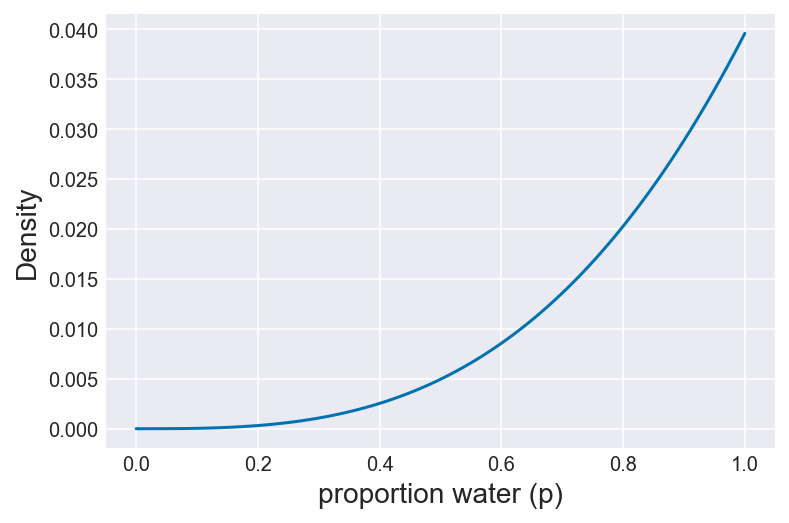

In [10]:
p_grid, posterior = posterior_grid_approx(success=3, tosses=3)
plt.plot(p_grid, posterior)
plt.xlabel('proportion water (p)', fontsize=14)
plt.ylabel('Density', fontsize=14);

In [11]:
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)
np.percentile(samples, [25, 75])

array([0.70707071, 0.93939394])

In [12]:
pm.hpd(samples, alpha=0.5)

array([0.84848485, 1.        ])

In [13]:
p_grid[posterior == max(posterior)]

array([1.])

In [14]:
stats.mode(samples)[0]

array([0.97979798])

In [15]:
np.mean(samples), np.median(samples)

(0.804310101010101, 0.8484848484848485)

In [16]:
sum(posterior * abs(0.5 - p_grid))

0.31626874808692995

In [17]:
loss = [sum(posterior * abs(p - p_grid)) for p in p_grid]
p_grid[loss == min(loss)]

array([0.84848485])